# Principal Component Analysis (PCA)


### 1. Giới thiệu về PCA

Principal Component Analysis (PCA) là phép phân tích các thành phần chính, là một thuật toán thống kê sử dụng ` phép biến đổi trực giao` để biến đổi tập dữ liệu từ một không gian nhiều chiều sang một không gian mới ít chiều hơn (2 hoặc 3 chiều) nhằm tối ưu hóa việc thể hiện sự biến thiên của dữ liệu.

Đây là một trong những kỹ thuật quan trọng trong Machine Learning. Mục tiêu của thuật toán là giảm số chiều của dữ liệu (đây cũng được coi là một phương pháp nén dữ liệu), tối ưu cho việc tính toán và lưu trữ.

**Ứng dụng**:

- Tìm mối liên hệ giữa các biến trong dữ liệu
- Giải thích và trực quan hóa dữ liệu
- Khi số lượng biến giảm, PCA làm cho việc phân tích sâu hơn, đơn giản hơn
- Thường được sử dụng để mô phỏng khoảng cách di truyền và mối liên hệ giữa các quàn thể.

**Bài toán** : Giảm chiều dữ liệu từ D về K < D, tức là chỉ giữ lại K phần tử quan trọng nhất. 

Tuy nhiên việc làm này chưa phải tốt nhất vì chúng ta chưa biết xác định thành phần nào là quan trọng hơn. Vì thế ta sẽ biểu diễn các vector dữ liệu ban dầu trong một hệ cơ sở mới mà tỏng hệ cơ sở đó, tầm quan trọng của các thành phần là khác nhau rõ rết và sẽ bỏ ua những thành phần ít quan trọng nhất.

PCA chính là phương pháp tìm một hệ cơ sở mới sao cho thông tin của dữ liệu chủ ếu tập trung ở một vài tọa độ, phần còn lại chie mang một lượng nhỏ thông tin. Và để đơn giản cho việc tính toán, PCA sẽ tìm một hệ trực chuẩn để làm cơ sở mới.

Giả sử hệ trực chuẩn mới là `U` và chúng ta muốn giữ lại `K` tọa độ trong hệ cơ sở mới này. Ta giả sử đó là K thành phần đầu tiên.

![pca_idea.png](pca_idea.png)

Cụ thể hơn về phần ý tưởng tham khảo link dưới đây:
https://machinelearningcoban.com/2017/06/15/pca/#3-principal-component-analysis


### 2. Các thành phần chính trong PCA

- Principal Axis Method (Phương pháp trục chính): PCA cơ bản tìm kiếm một tổ hợp tuyến tính các biến để từ đó chúng ta có thể trích xuất ra phương sai. Khi qua trình này hoàn thành, nó sẽ loại bỏ và đưa ra tỷ lệ phương sai tối đa còn lại dẫn đến các yếu tốt trực giao. Trong ví dụ này, mình sẽ sử dụng phân tích tổng phương sai.


- Eigenvector: Vector khác 0, nằm song song khi nhân ma trận. Ví dụ đặt x là 1 eigen vector r chiều của ma trận M với chiều là `r*r` nếu `Mx` và x song song. Sau đó ta cần giải quyết `Mx = Ax` khi cả `x` và `A` đều không xác định để tính giá trị của eigen vector và eigen values.
  
  Trong Eigen-vectơ, chúng ta có thể nói rằng các thành phần gốc hiển thị cả phương sai chung và duy nhất của biến. Về cơ bản, đó là phương pháp tập trung vào phương sai tìm cách tái tạo tổng phương sai và tương quan với tất cả các thành phần. Các thành phần chính về cơ bản là sự kết hợp tuyến tính của các biến ban đầu có trọng số bởi sự đóng góp của chúng để giải thích phương sai trong một chiều trực giao cụ thể.
  

- Eigen Values: Gọi là root đặc trưng. Về cơ bản, nó đo lường phương sai trong tất cae các biến được tính bởi yếu tốt đó. Tỷ lệ của egien values là tỷ lệ về tầm quan trọng của các yếu tốt liên quan đến các biến. Nói đơn giản, nó đo lượng phương sai trong tổng số dữ liệu đã cho được tinhs theo yếu tố. chúng ta có thể tính eigen values như là tổng bình phương của các biến.


#### Bước 1: Import thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Bước 2: Import data set

Dữ liệu: [Wine] (

In [2]:
#load dataset
dataset = pd.read_csv('wine.csv')

#Phan chia thanh 2 phan X va Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [3]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

#### Bước 3: Chia dataset thành Training set và Test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
X_train

array([[1.369e+01, 3.260e+00, 2.540e+00, ..., 9.600e-01, 1.820e+00,
        6.800e+02],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.162e+01, 1.990e+00, 2.280e+00, ..., 1.160e+00, 2.960e+00,
        3.450e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

In [7]:
X_test

array([[1.374e+01, 1.670e+00, 2.250e+00, 1.640e+01, 1.180e+02, 2.600e+00,
        2.900e+00, 2.100e-01, 1.620e+00, 5.850e+00, 9.200e-01, 3.200e+00,
        1.060e+03],
       [1.279e+01, 2.670e+00, 2.480e+00, 2.200e+01, 1.120e+02, 1.480e+00,
        1.360e+00, 2.400e-01, 1.260e+00, 1.080e+01, 4.800e-01, 1.470e+00,
        4.800e+02],
       [1.237e+01, 1.130e+00, 2.160e+00, 1.900e+01, 8.700e+01, 3.500e+00,
        3.100e+00, 1.900e-01, 1.870e+00, 4.450e+00, 1.220e+00, 2.870e+00,
        4.200e+02],
       [1.356e+01, 1.730e+00, 2.460e+00, 2.050e+01, 1.160e+02, 2.960e+00,
        2.780e+00, 2.000e-01, 2.450e+00, 6.250e+00, 9.800e-01, 3.030e+00,
        1.120e+03],
       [1.305e+01, 5.800e+00, 2.130e+00, 2.150e+01, 8.600e+01, 2.620e+00,
        2.650e+00, 3.000e-01, 2.010e+00, 2.600e+00, 7.300e-01, 3.100e+00,
        3.800e+02],
       [1.156e+01, 2.050e+00, 3.230e+00, 2.850e+01, 1.190e+02, 3.180e+00,
        5.080e+00, 4.700e-01, 1.870e+00, 6.000e+00, 9.300e-01, 3.690e+00,
        4.65

#### Bước 4: Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Bước 5: áp dụng PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

#### Bước 6: Logistic Regression cho training set

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\Thinkpad T470s\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thinkpad T470s\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Bước 7: Dự đoán trên tập test

In [11]:
y_pred = classifier.predict(X_test)

#### Bước 8: Tạo confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#### Bước 9: Dự đoán kết quả training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


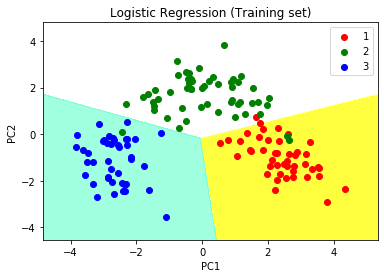

In [13]:
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

#### Bước 10: Biểu diễn kết quả trên Test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


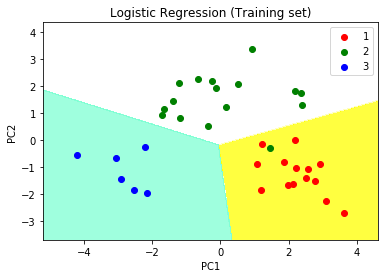

In [14]:
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

### Tài liệu tham khảo

https://www.geeksforgeeks.org/principal-component-analysis-with-python/